# Blog Your Solution Project


# Introduction
In this project, we shall pick a dataset, analyse it, draw insight from the data and use it to answer business questions posed. 
We shall follow the CRISP-DM(Cross Industry Process For Data Mining) Methodology which consists following steps:
+ Business Understanding
+ Data Understanding 
+ Data Preparation
+ Modelling 
+ Evaluation
+ Deployment.



## Step 1: Business Understanding

Big up to everyone who thinks or plans on having an application on an appstore(precisely the apple appstore), and a "bigger up" for those who already have. Putting an app on an app store is a big step. The other step is to get people to download and use the app. 
The number of downloads of an app very much depends on rating, and the number of reviews given for the said app. According to a [suvey](https://www.apptentive.com/blog/2015/05/05/app-store-ratings-reviews-guide/) conducted by [Appentive](https://www.apptentive.com/), a company which uses customer feedback to help compainies increase their app downloads:
+ 92% of the top 100 paid apps have at least a 4 star rating.
+ 98% of the top 100 free apps have at least a 4 star rating

So before asking the team of developers to start working on one of those 'killer' app-ideas that will be next big thing and make millions, it may be wise to look into the appstore and investigate factors affecting user ratings and the different categories or genres of applications.
Is it possible to predict if an app will be highly rated or not? 
What can one do to maximise the chances for his/her app to be highly rated?

My team of 1 has decided to embark on such a task. 
Come with me as we explore the Apple app store to see if we can make some sense out of the ratings and find out information that can help the future app developer. 

We will attemp to answer questions like:
+ Which genre of applications are most common on the app store?
+ What is the most common rating? 
+ Which genre of applications are highly rated and which are least rated?
+ How does the number of languages and supported devices affect user rating?
+ Can the rating of the application be predicted from the initial properties of the application(size, supported devices, languages, price….)



## Step 2: Data Understanding

### The Data
The [dataset](https://www.kaggle.com/ramamet4/app-store-apple-data-set-10k-apps/home) for this project was obtained from kaggle. The data contains 7197 rows and 16 columns. The columns are as follows:

+ "id" : App ID
+ "track_name": App Name
+ "size_bytes": Size (in Bytes)
+ "currency": Currency Type
+ "price": Price amount
+ "rating_count_tot": User Rating counts (for all version)
+ "rating_count_ver": User Rating counts (for current version)
+ "user_rating" : Average User Rating value (for all version)
+ "user_rating_ver": Average User Rating value (for current version)
+ "ver" : Latest version code
+ "cont_rating": Content Rating
+ "prime_genre": Primary Genre
+ "sup_devices.num": Number of supporting devices
+ "ipadSc_urls.num": Number of screenshots showed for display
+ "lang.num": Number of supported languages
+ "vpp_lic": Vpp Device Based Licensing Enabled

In [1]:
# Import the necessary libaries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
from sklearn.preprocessing import StandardScaler
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn import svm
from sklearn.grid_search import GridSearchCV
from sklearn.svm import SVC
%matplotlib inline

/home/comp-guru/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/home/comp-guru/anaconda3/lib/python3.6/site-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [2]:
# Load in data
app_store = pd.read_csv("AppleStore.csv",delimiter=",")
#Print number of apps in the data set
number_of_apps = len(app_store.id)
print("Number of apps in the dataset is " + str(number_of_apps))

Number of apps in the dataset is 7197


In [3]:
# Now Let us see the columns and type of each column in the dataset
app_store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7197 entries, 0 to 7196
Data columns (total 17 columns):
Unnamed: 0          7197 non-null int64
id                  7197 non-null int64
track_name          7197 non-null object
size_bytes          7197 non-null int64
currency            7197 non-null object
price               7197 non-null float64
rating_count_tot    7197 non-null int64
rating_count_ver    7197 non-null int64
user_rating         7197 non-null float64
user_rating_ver     7197 non-null float64
ver                 7197 non-null object
cont_rating         7197 non-null object
prime_genre         7197 non-null object
sup_devices.num     7197 non-null int64
ipadSc_urls.num     7197 non-null int64
lang.num            7197 non-null int64
vpp_lic             7197 non-null int64
dtypes: float64(3), int64(9), object(5)
memory usage: 955.9+ KB


In [4]:
#We define a function,`summarize()` that will print a summary of the dataset and show us what it looks like
def summarize(df, head=100):
    """The function summarizes any dataframe by describing and also showing a few header columns
    
    Args:
        df: (Dataframe): The pandas dataframe.
        head: (int): The number of head rows to display(default: 10).

    Returns:
        void
    """
    display(df.describe())
    display(df.head(head))
summarize(app_store)

,Unnamed: 0,id,size_bytes,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
count,7197.000000,7.197000e+03,7.197000e+03,7197.000000,7.197000e+03,7197.000000,7197.000000,7197.000000,7197.000000,7197.000000,7197.000000,7197.000000
mean,4759.069612,8.631310e+08,1.991345e+08,1.726218,1.289291e+04,460.373906,3.526956,3.253578,37.361817,3.707100,5.434903,0.993053
std,3093.625213,2.712368e+08,3.592069e+08,5.833006,7.573941e+04,3920.455183,1.517948,1.809363,3.737715,1.986005,7.919593,0.083066
min,1.000000,2.816565e+08,5.898240e+05,0.000000,0.000000e+00,0.000000,0.000000,0.000000,9.000000,0.000000,0.000000,0.000000
25%,2090.000000,6.000937e+08,4.692275e+07,0.000000,2.800000e+01,1.000000,3.500000,2.500000,37.000000,3.000000,1.000000,1.000000
50%,4380.000000,9.781482e+08,9.715302e+07,0.000000,3.000000e+02,23.000000,4.000000,4.000000,37.000000,5.000000,1.000000,1.000000
75%,7223.000000,1.082310e+09,1.819249e+08,1.990000,2.793000e+03,140.000000,4.500000,4.500000,38.000000,5.000000,8.000000,1.000000
max,11097.000000,1.188376e+09,4.025970e+09,299.990000,2.974676e+06,177050.000000,5.000000,5.000000,47.000000,5.000000,75.000000,1.000000


,Unnamed: 0,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
0,1,281656475,PAC-MAN Premium,100788224,USD,3.99,21292,26,4.0,4.5,6.3.5,4+,Games,38,5,10,1
1,2,281796108,Evernote - stay organized,158578688,USD,0.00,161065,26,4.0,3.5,8.2.2,4+,Productivity,37,5,23,1
2,3,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,USD,0.00,188583,2822,3.5,4.5,5.0.0,4+,Weather,37,5,3,1
3,4,282614216,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,USD,0.00,262241,649,4.0,4.5,5.10.0,12+,Shopping,37,5,9,1
4,5,282935706,Bible,92774400,USD,0.00,985920,5320,4.5,5.0,7.5.1,4+,Reference,37,5,45,1
5,6,283619399,Shanghai Mahjong,10485713,USD,0.99,8253,5516,4.0,4.0,1.8,4+,Games,47,5,1,1
6,7,283646709,PayPal - Send and request money safely,227795968,USD,0.00,119487,879,4.0,4.5,6.12.0,4+,Finance,37,0,19,1
7,8,284035177,Pandora - Music & Radio,130242560,USD,0.00,1126879,3594,4.0,4.5,8.4.1,12+,Music,37,4,1,1
8,9,284666222,PCalc - The Best Calculator,49250304,USD,9.99,1117,4,4.5,5.0,3.6.6,4+,Utilities,37,5,1,1
9,10,284736660,Ms. PAC-MAN,70023168,USD,3.99,7885,40,4.0,4.0,4.0.4,4+,Games,38,0,10,1


In [5]:
#Rename the first column to csv_index
new_cols = ['csv_index']
app_store.rename(columns=dict(zip(app_store.columns[:1], new_cols)),inplace=True)
summarize(app_store)

,csv_index,id,size_bytes,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
count,7197.000000,7.197000e+03,7.197000e+03,7197.000000,7.197000e+03,7197.000000,7197.000000,7197.000000,7197.000000,7197.000000,7197.000000,7197.000000
mean,4759.069612,8.631310e+08,1.991345e+08,1.726218,1.289291e+04,460.373906,3.526956,3.253578,37.361817,3.707100,5.434903,0.993053
std,3093.625213,2.712368e+08,3.592069e+08,5.833006,7.573941e+04,3920.455183,1.517948,1.809363,3.737715,1.986005,7.919593,0.083066
min,1.000000,2.816565e+08,5.898240e+05,0.000000,0.000000e+00,0.000000,0.000000,0.000000,9.000000,0.000000,0.000000,0.000000
25%,2090.000000,6.000937e+08,4.692275e+07,0.000000,2.800000e+01,1.000000,3.500000,2.500000,37.000000,3.000000,1.000000,1.000000
50%,4380.000000,9.781482e+08,9.715302e+07,0.000000,3.000000e+02,23.000000,4.000000,4.000000,37.000000,5.000000,1.000000,1.000000
75%,7223.000000,1.082310e+09,1.819249e+08,1.990000,2.793000e+03,140.000000,4.500000,4.500000,38.000000,5.000000,8.000000,1.000000
max,11097.000000,1.188376e+09,4.025970e+09,299.990000,2.974676e+06,177050.000000,5.000000,5.000000,47.000000,5.000000,75.000000,1.000000


,csv_index,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
0,1,281656475,PAC-MAN Premium,100788224,USD,3.99,21292,26,4.0,4.5,6.3.5,4+,Games,38,5,10,1
1,2,281796108,Evernote - stay organized,158578688,USD,0.00,161065,26,4.0,3.5,8.2.2,4+,Productivity,37,5,23,1
2,3,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,USD,0.00,188583,2822,3.5,4.5,5.0.0,4+,Weather,37,5,3,1
3,4,282614216,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,USD,0.00,262241,649,4.0,4.5,5.10.0,12+,Shopping,37,5,9,1
4,5,282935706,Bible,92774400,USD,0.00,985920,5320,4.5,5.0,7.5.1,4+,Reference,37,5,45,1
5,6,283619399,Shanghai Mahjong,10485713,USD,0.99,8253,5516,4.0,4.0,1.8,4+,Games,47,5,1,1
6,7,283646709,PayPal - Send and request money safely,227795968,USD,0.00,119487,879,4.0,4.5,6.12.0,4+,Finance,37,0,19,1
7,8,284035177,Pandora - Music & Radio,130242560,USD,0.00,1126879,3594,4.0,4.5,8.4.1,12+,Music,37,4,1,1
8,9,284666222,PCalc - The Best Calculator,49250304,USD,9.99,1117,4,4.5,5.0,3.6.6,4+,Utilities,37,5,1,1
9,10,284736660,Ms. PAC-MAN,70023168,USD,3.99,7885,40,4.0,4.0,4.0.4,4+,Games,38,0,10,1


In [6]:
def bar_chart(data,labels, figsize, ylabel, xlabel, title, rotation=90):
    """plot a bar chart distribution of the incoming data
    Args:
        data: (numpy array) data to plot on the y-axis
        labels: (numpy array) data to plot on the x-axis
        figsize: (tuple)figure size of the figure to plot
        ylabel: (str)the ylabel of the plot
        xlabel: (str)the xlabel of the plot
        title: (str)the title of the plot
        rotation: (int) rotation angle of x labels
    Returns:
        void:
    """
    sns.set(rc={'figure.figsize':figsize})
    plot = sns.barplot(labels,data)  
    plot.set_xticklabels(plot.get_xticklabels(), rotation=rotation) #set rotation of x-axis labels
    plot.set(ylabel=ylabel, xlabel=xlabel, title=title)   

    
    
def pie_chart(data,labels, title ):
    """plot a pie chart distribution of the incoming data
    Args:
        data: (numpy array) data to plot on the y-axis
        labels: (numpy array) data to plot on the x-axis
        title: (str)the title of the plot
        colors: colors for each chart
    Returns:
        void:
    """
    # Plot
    #fig = plt.figure(figsize=[23, 23])
    plt.pie(data, labels=labels,
            autopct='%1.1f%%', shadow=False, startangle=140)
    #plt.figure(figsize=(15,15))
    plt.axis('equal')
    plt.title(title)
    plt.show()
    
    
def plot_count( x, xlabel, ylabel, title, data=app_store, hue=None,legend_title=None, rotation=0, loc='upper right'):
    """Plot a bar chart distribution of incoming data
    Args:
        x: (numpy array) data to plot on the y-axis
        ylabel: (str)the ylabel of the plot
        xlabel: (str)the xlabel of the plot
        title: (str)the title of the plot
        hue: (str)data encoded in colors
        legend_title: tiltle of the legend if it has one
        rotation: (int) rotation angle of x labels
        loc: location of the legend if present
    Returns:
        void:
    """
    plot = sns.countplot(x = x, hue=hue, data=data)
    plot.set_xticklabels(plot.get_xticklabels(), rotation=rotation) #set rotation of x-axis labels
    plot.set(xlabel=xlabel, ylabel=ylabel, title=title)
    
    if hue is None:
        pass
    else:
        plot.legend(loc=loc, title=legend_title)
        

Is there any null value?:  False


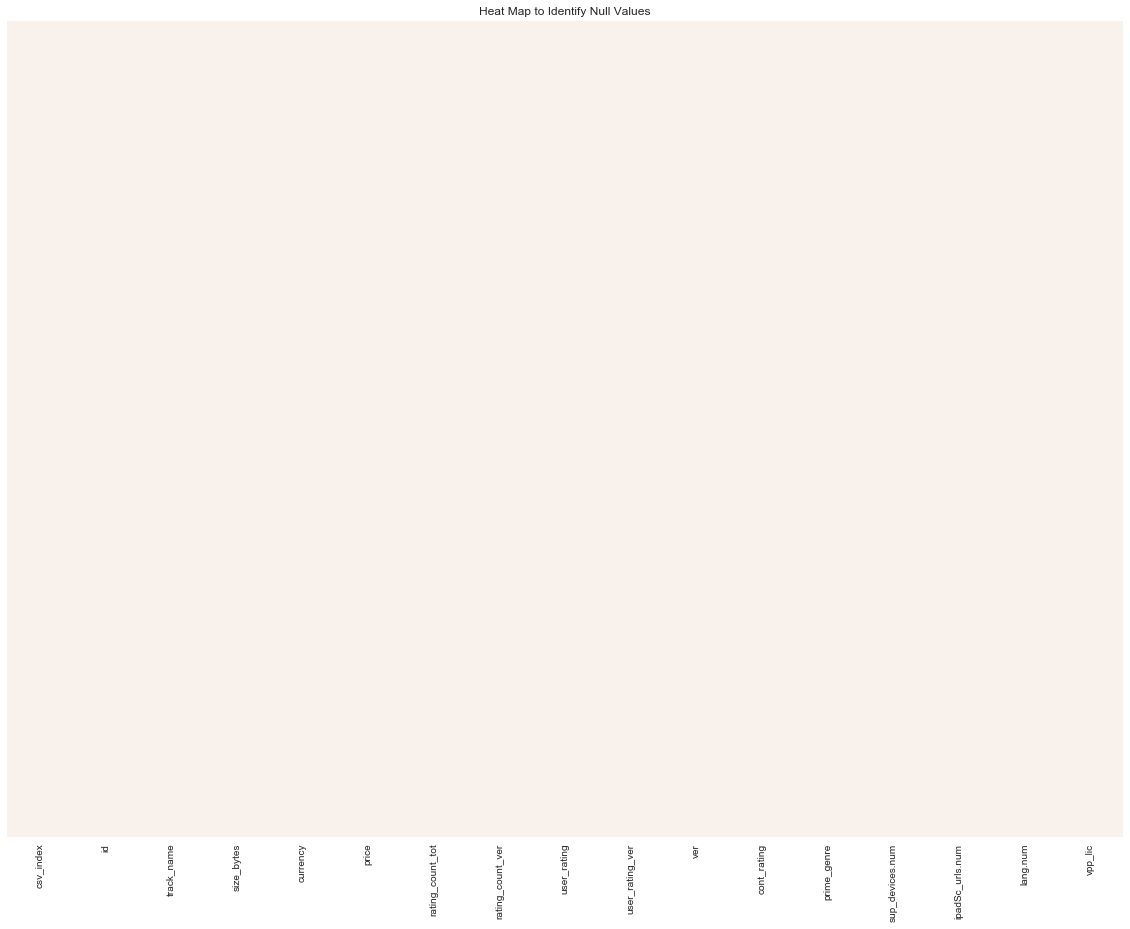

In [7]:
#Plot a heatmap of the dataset to see if there are null, nan or missing values
is_there_any_null_value =  app_store.isnull().values.any()
print("Is there any null value?: ", is_there_any_null_value)
sns.set(rc={'figure.figsize':(20, 15)})
sns.heatmap(app_store.isnull(), yticklabels=False, cbar=False).set_title("Heat Map to Identify Null Values")

### Data Exploration
In the next few cells, we are going to explore our data and see what it looks like. We shall also be answering some of the questions posed above. 

#### 1. Distribution Per Genre.
The first thing we will look at is the distribution per genre; the number of genres, and what percentage of applications are in genre.
This will answer our first question: 
> Which genre of applications are most common on the app store?

>My hypo thesis is that the game genre is the most common.

There are 23 genres of applications in the data set
The most common genre is the games genre making up to 0.5366124774211477 of the dataset


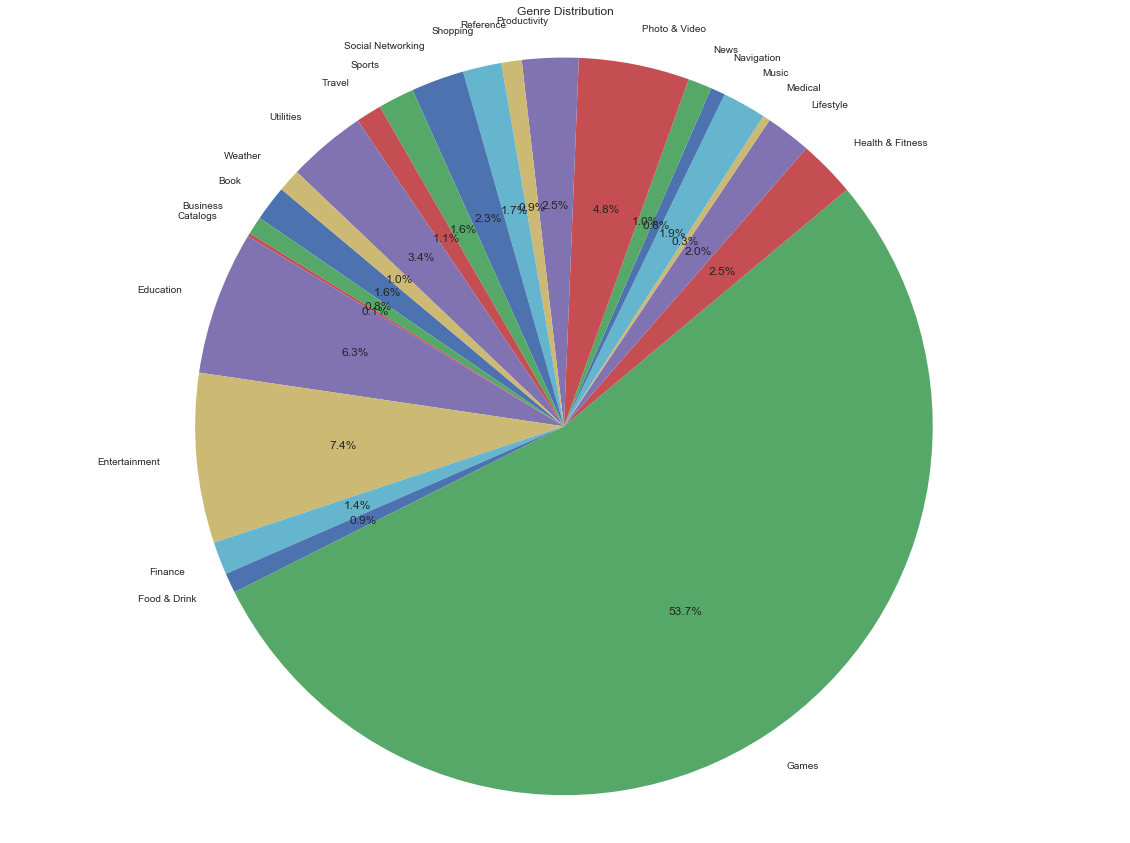

In [8]:
# we will first look at the distribution per genre
index, count = np.unique(app_store["prime_genre"],return_counts=True)
unique = app_store["prime_genre"].nunique()
print("There are {} genres of applications in the data set".format(unique))
count = count/count.sum()
print('The most common genre is the games genre making up to {} of the dataset'.format(count[7]))

#bar_chart(count,index,(20,8),"Percentage of Genre in whole dataset", "App Genre","Genre distribution" ,60)
pie_chart(count, index, "Genre Distribution")


##### Observation
From pie chart, it can be seen that "Games" are the most common applications on the app store(making up to 53%),  followed by "Entertainment" and "Education" applications. The least common are "Catalogs" and "Medical" applications.
This proves the initrial hypothesis to be true. I couldn't however imaging that the education category would be third.


#### 2. Most Common Ratings
The next thing we shall explore is distribution per rating. This will hepl answer the 2nd question:
> What is the most common rating?

>My hypothesis is that the most common rating is 3.5 or 4

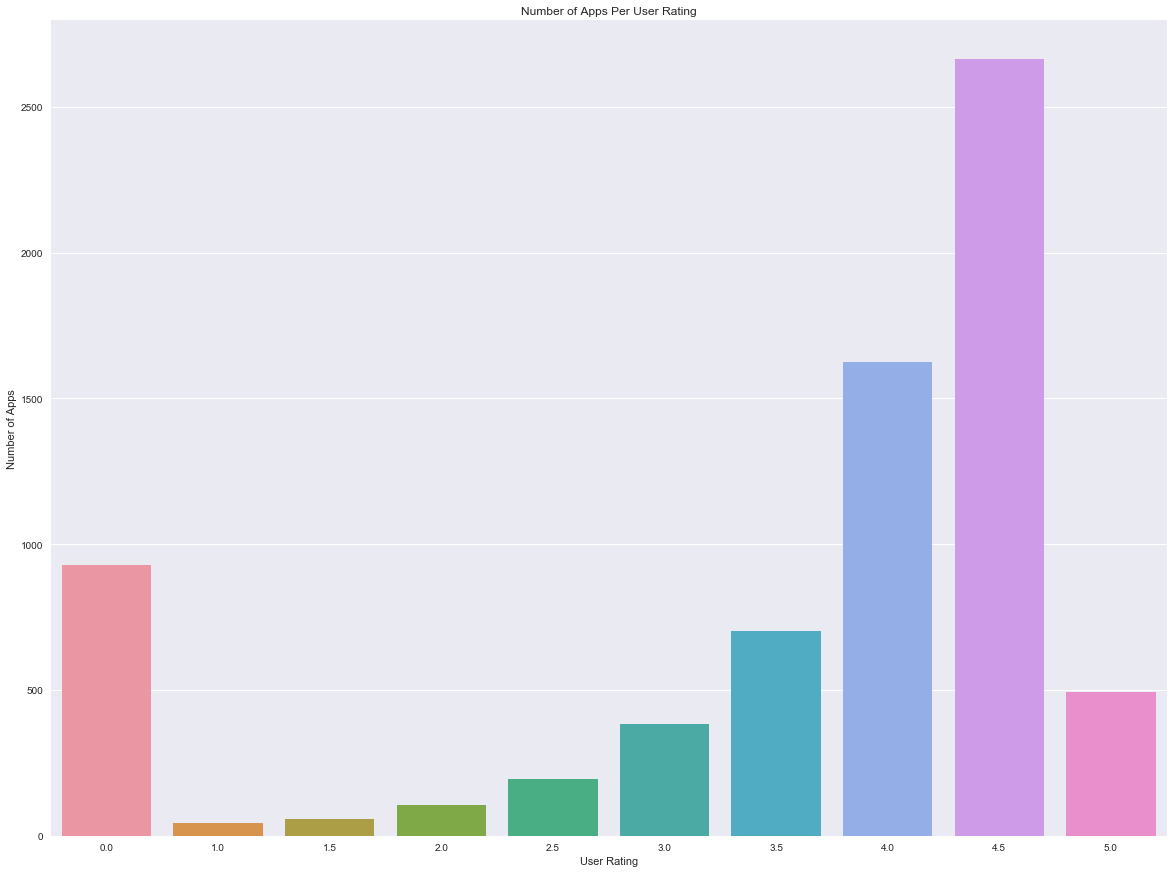

In [9]:
plot_count('user_rating','User Rating', 'Number of Apps','Number of Apps Per User Rating' )

##### Observation
The most common rating, or the rating that is largest is 4.5, followed by 4 and then 3.5. My hypothesis was false in this case. There are a good number of applications with no ratings (about 850 applications).It is interestting to see that the number of applications with no ratings is higher than the number of applications with a 5 star rating. 
More than 85% of the applications are rated however, and the ratings have been shown to be closely linked to the number of downloads as stated earlier.

#### 3. Number of applications per user rating per genre
Here, we will try to investigate the distribution of the ratings per genre. We will also look at the average rating per genre as well as answer our third question:
> Which genre of applications are highly rated and which are least rated?

> Given that people love entertainment, I think my initial hypothesis is that the entertainment genre has the highest average rating. 

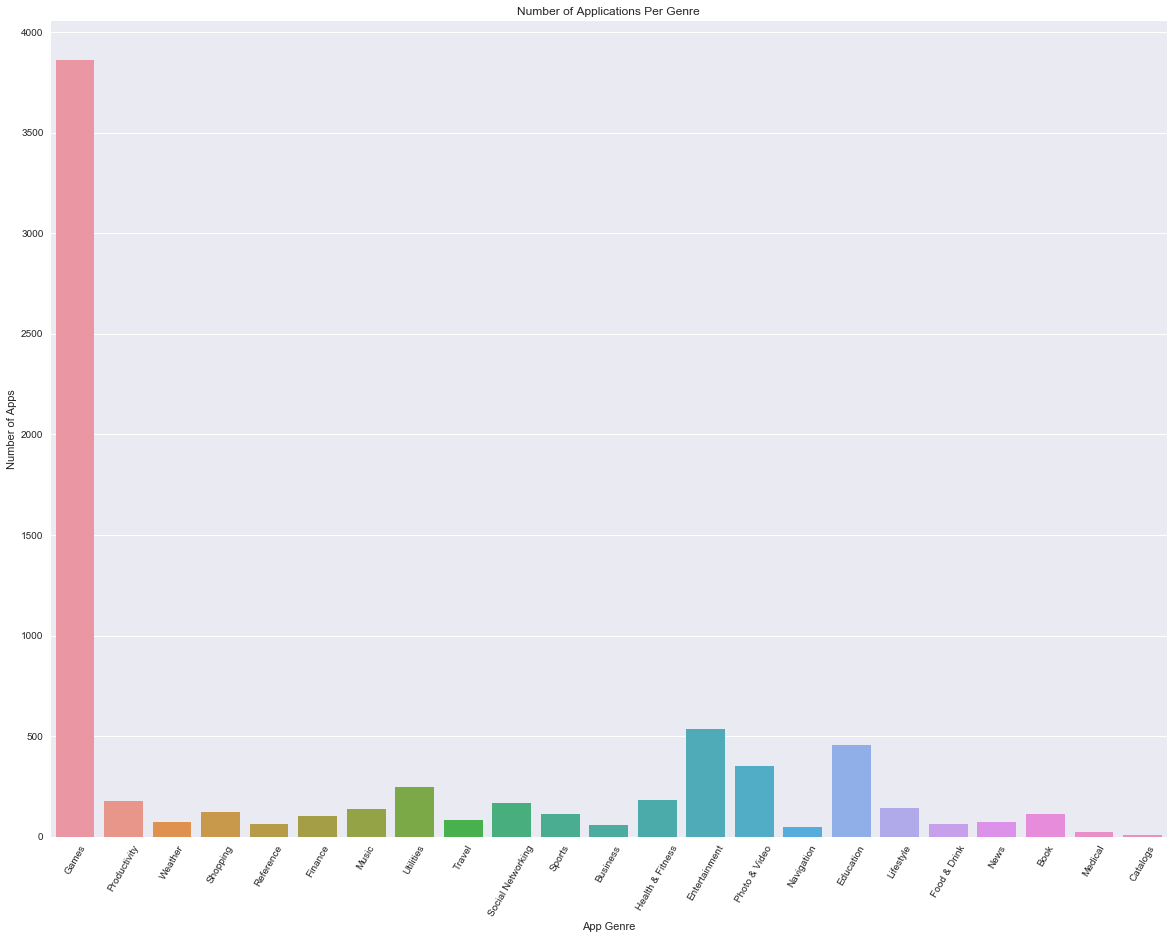

In [10]:
# Plot a graph of the number of applications per genre
plot_count('prime_genre', 'App Genre', 'Number of Apps', 'Number of Applications Per Genre', rotation=60)

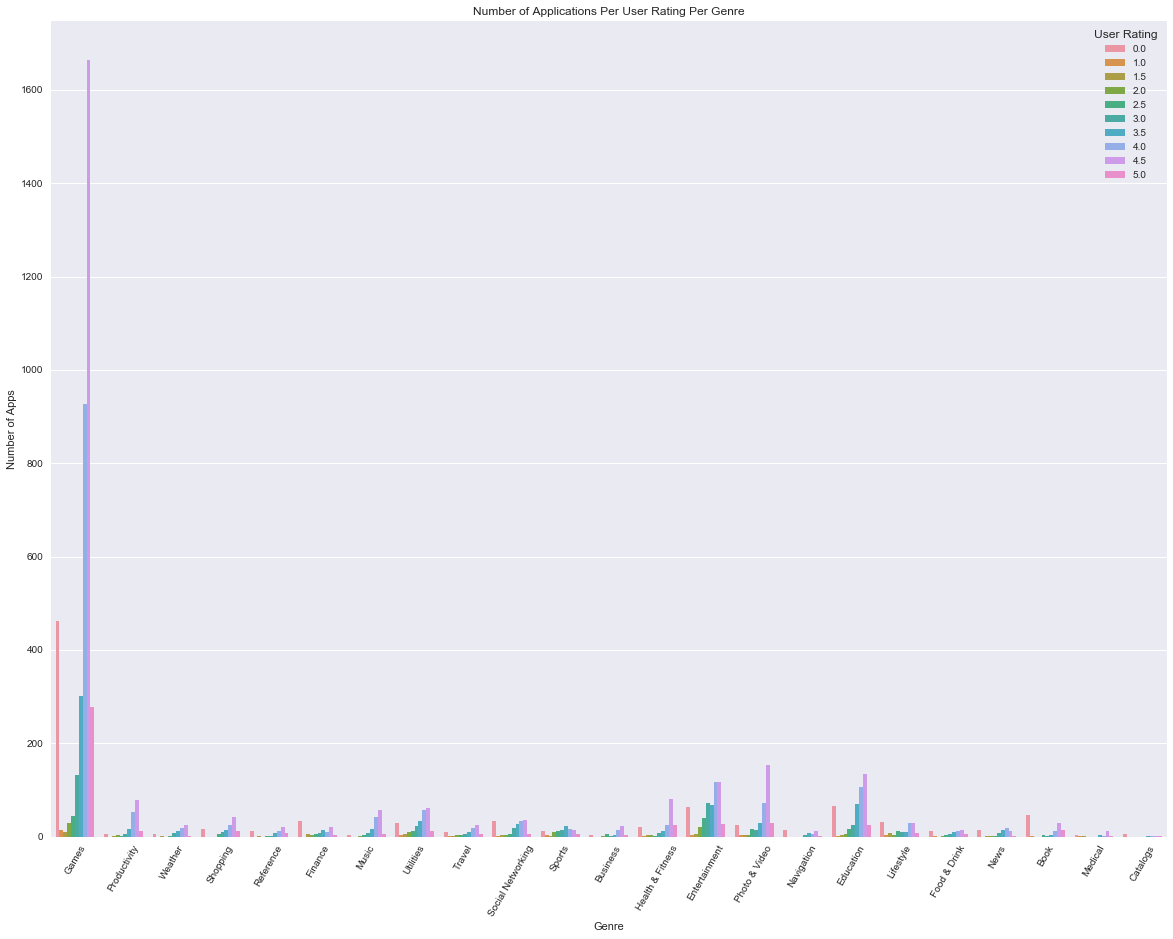

In [11]:
# Plot a graph of the number of applications per user rating per genre
plot_count('prime_genre', 'Genre','Number of Apps', 
           'Number of Applications Per User Rating Per Genre', hue='user_rating', legend_title='User Rating', rotation=60)

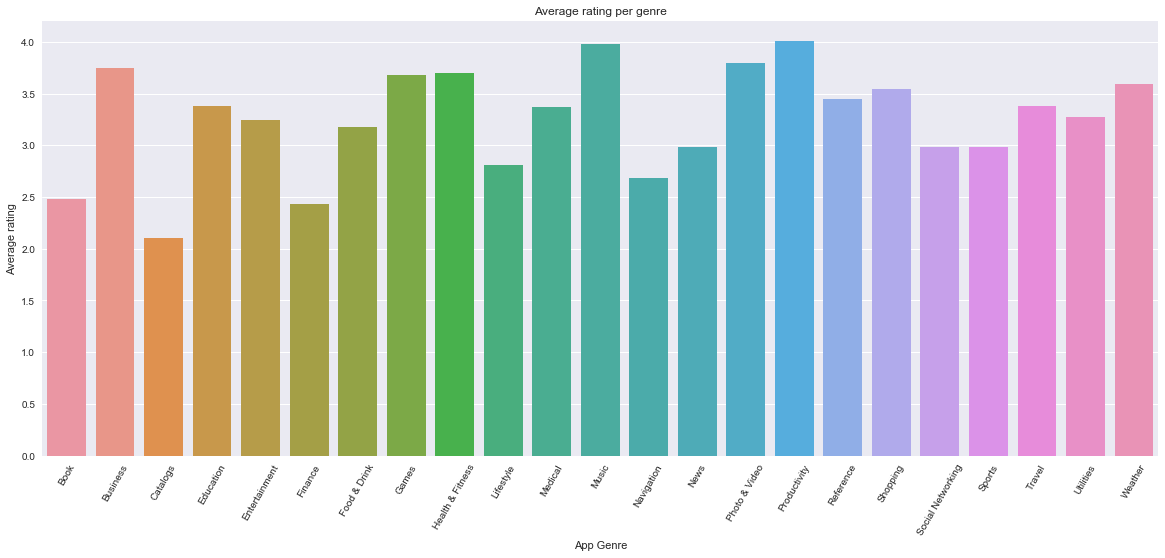

In [12]:
# # Plot a graph of rating per genre
stats = app_store.groupby("prime_genre")['user_rating']
genres, count = np.unique(app_store["prime_genre"],return_counts=True)
describe = stats.describe()
describe["genre"]=genres
bar_chart(describe["mean"],index,(20,8),"Average rating", "App Genre","Average rating per genre" ,60)

##### Observation
We had already seen that the games genre made up slightly more than half of the applications in the dataset. 
It thus has the highest number of ratings, with the least rated app genres being medical and catalogs.
The productivity genre however has the highest average rating, followed by the music and business genres. 
The initial hypothesis is thus false as the productivity genre beats entertainment. I must say this was a little surprising. 
Catalog and Medical genres still have the lowest average rating.
The most common rating per genre is 4.5.

#### 4. How language affects user ratings.
In this section, we shall investigate the effect of the number of languages on the user rating, and also see if there is some particular category that has more number of languages that the other. We shall also thus be answering the fourth question:
> How does the number of languages and supported devices affect user rating?

> Here is my hypothesis; A lot! 

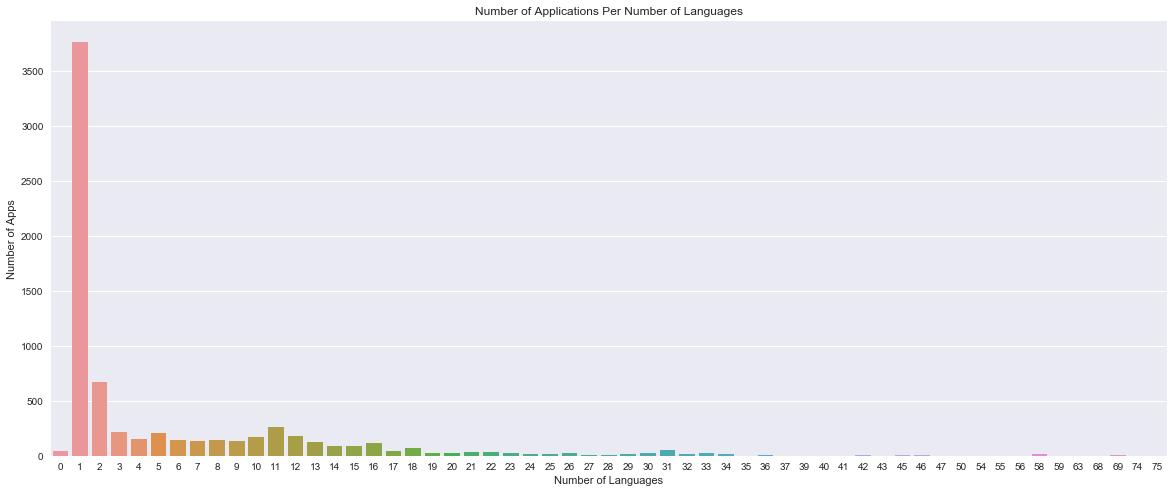

In [13]:
# Plot of number of applications per number of languages
plot_count('lang.num', 'Number of Languages', 'Number of Apps', 
           'Number of Applications Per Number of Languages')

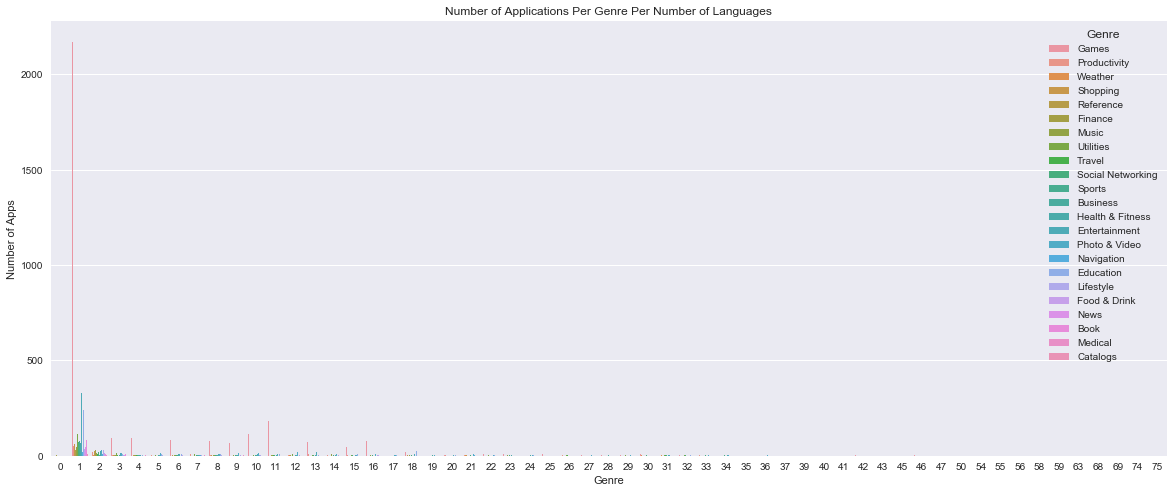

In [14]:
# Plot of number of applications per genre per number of languages
plot_count('lang.num', 'Genre', 'Number of Apps', 
           'Number of Applications Per Genre Per Number of Languages',hue='prime_genre', legend_title='Genre')

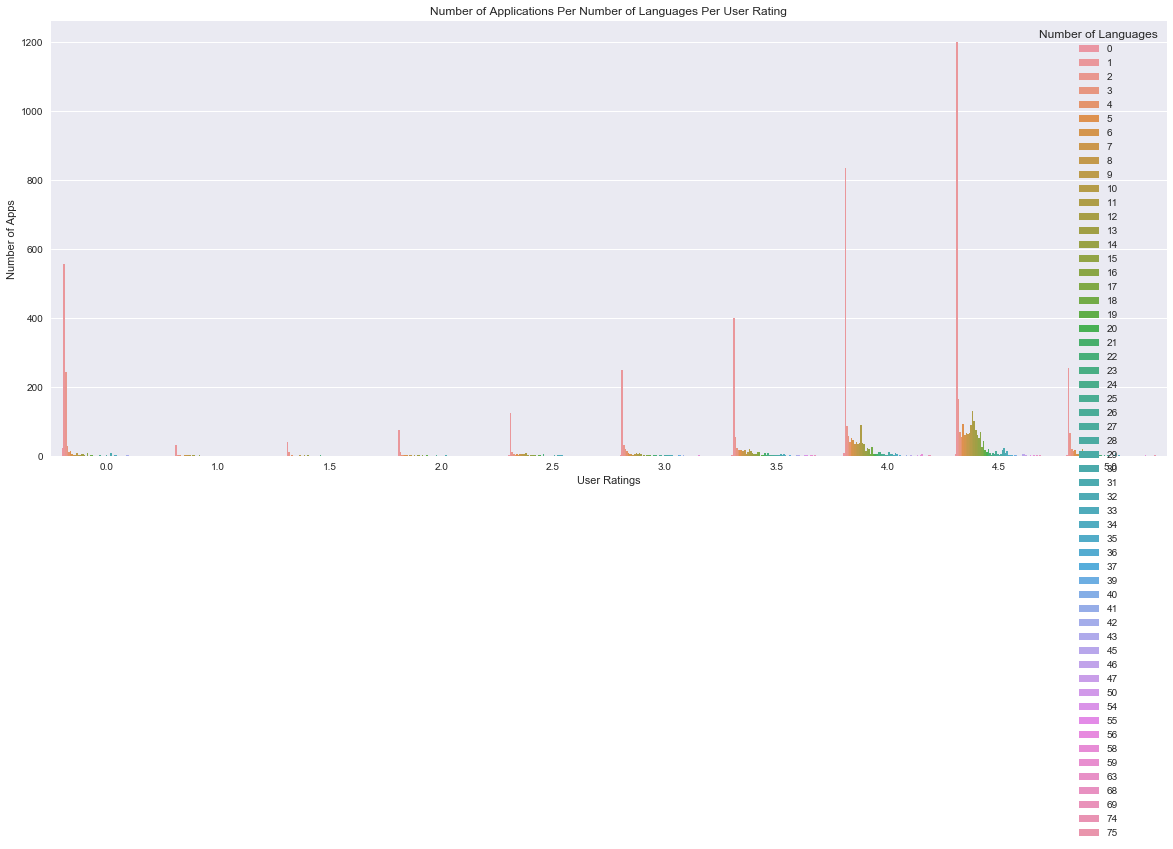

In [15]:
# Plot of Number of Apps per number of languages per user rating
plot_count('user_rating','User Ratings','Number of Apps',
          'Number of Applications Per Number of Languages Per User Rating', hue='lang.num', legend_title="Number of Languages")

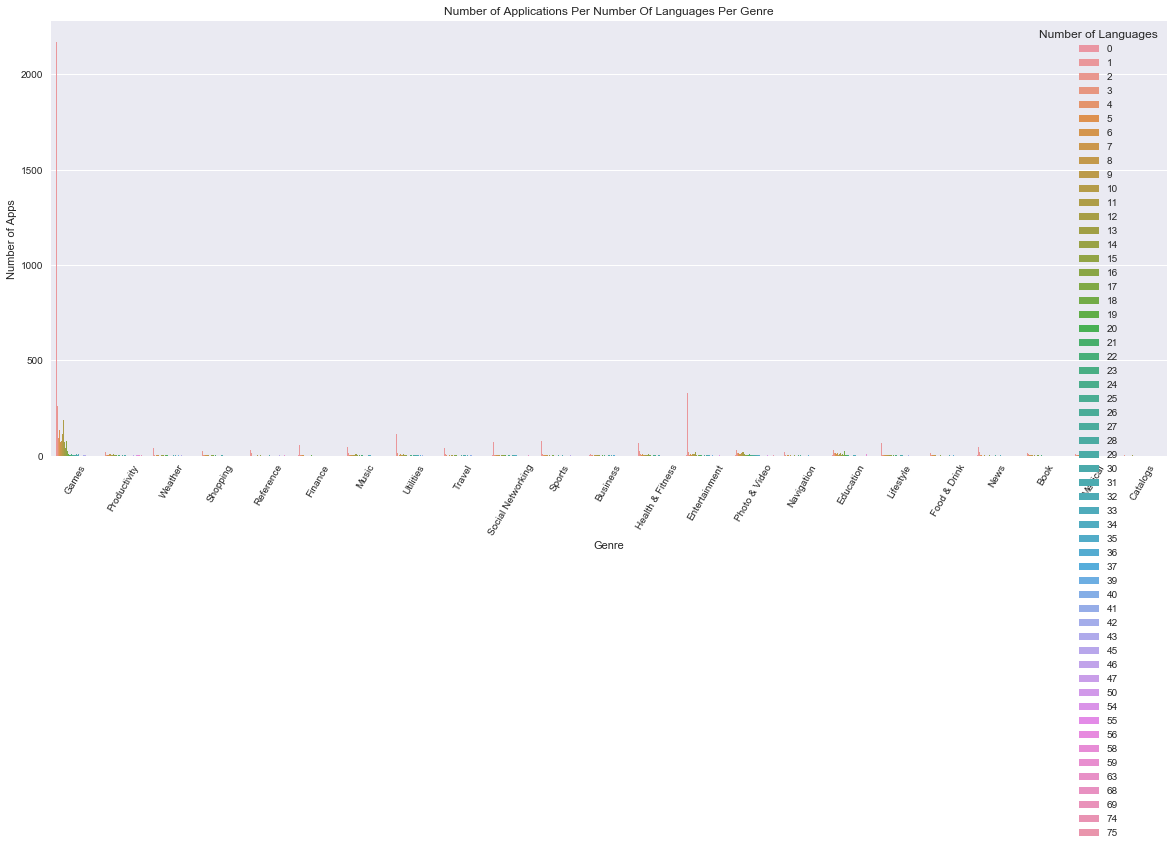

In [16]:
# Plot of Number of Apps per number of languages per genre
plot_count('prime_genre','Genre','Number of Apps',
           'Number of Applications Per Number Of Languages Per Genre',hue='lang.num', legend_title='Number of Languages',rotation=60)

##### Observation
We see here that most apps have only one language.Majority of applications in each user rating category support only one language too. Also, the most apps per category(genre) support onlyone language. We can thus conclude that there is no strong or significant correlation between user rating and number of supported languages. This answers our fourth question: "How does the number of supported languages affect user rating"?

#### 5. Does Number of Screenshots Shown For Display Affect User Rating ? 
Here, we are going to see if the number of screenshots shown for display affects user ratings. 
Also, what number of screenshots do most people put? 
> My hypothesis is that it doesn't. I am not sure there is a correlation between number of screenshots shown and user ratings, reason being that I think most people rate an app after having used it, and not just after looking at the images. 


This helps us answer the question posed above


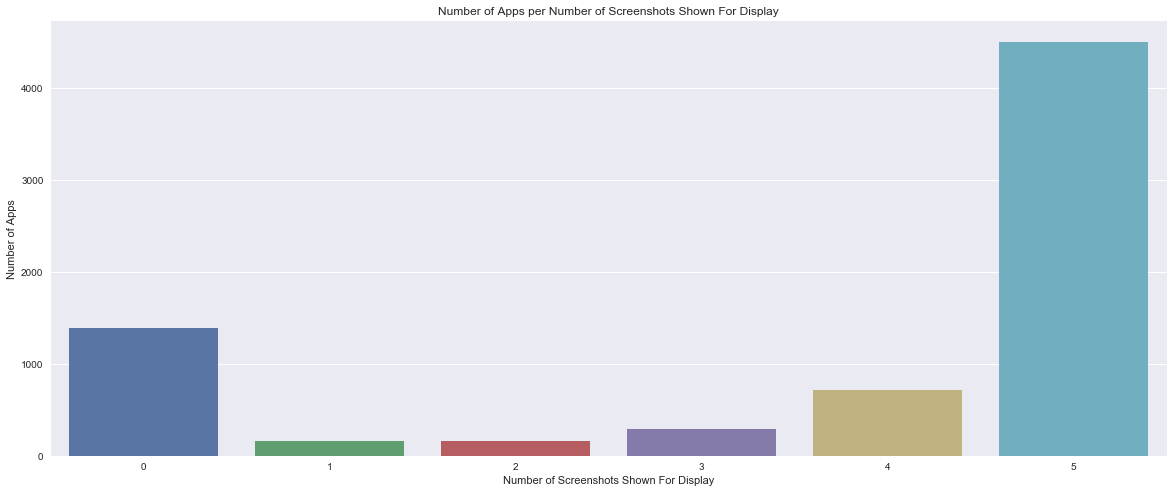

In [17]:
# Plot of Number of apps per number of screenshots shown for Display
plot_count('ipadSc_urls.num', 'Number of Screenshots Shown For Display', 'Number of Apps', 
         'Number of Apps per Number of Screenshots Shown For Display')

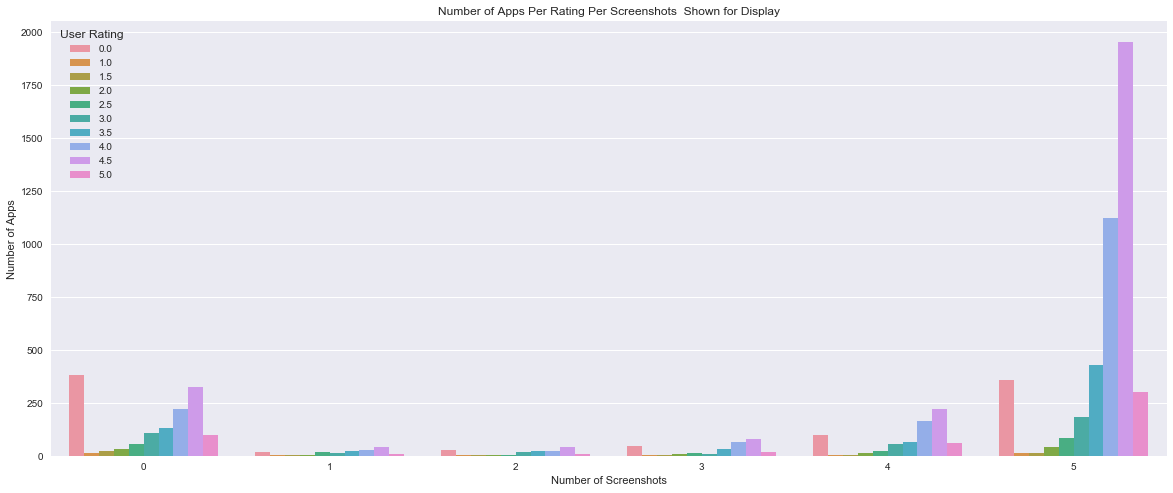

In [18]:
# Plot of Number of apps per rating per screenshots shown for display
plot_count('ipadSc_urls.num', 'Number of Screenshots', 'Number of Apps', 
          'Number of Apps Per Rating Per Screenshots  Shown for Display', hue='user_rating',legend_title='User Rating', loc='upper left')

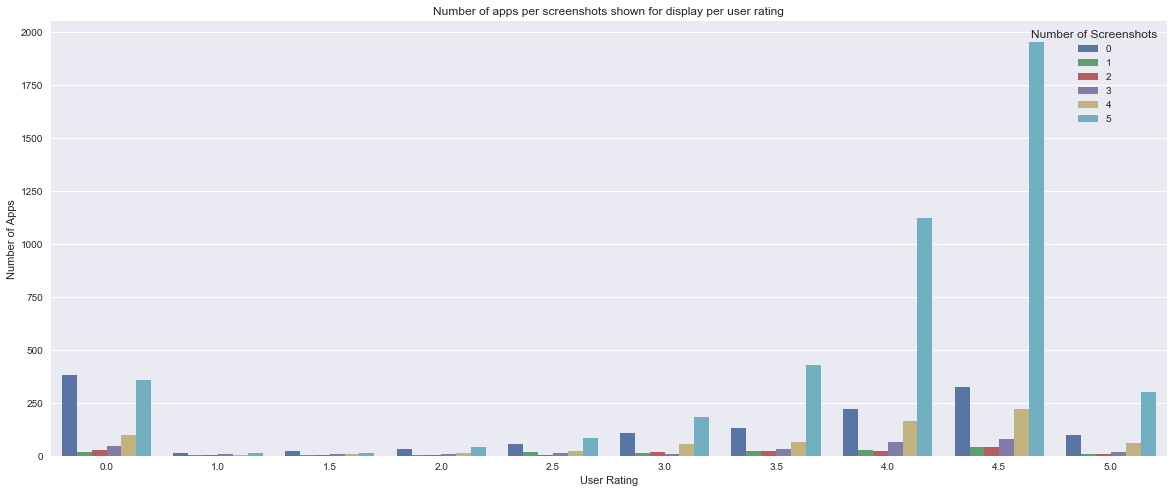

In [19]:
# Plot of number of apps per number of screenshot shown for display per user rating
plot_count('user_rating','User Rating', 'Number of Apps',
          'Number of apps per screenshots shown for display per user rating',
           hue='ipadSc_urls.num', legend_title='Number of Screenshots')

##### Observation
Apps with 5 images for display stand a higher chance of being rated than those with a smaller number of images. The most common rating per number of screenshots is 4.5, except for apps with no image, where the most common rating as some would have guessed is 0.
So my hypothesis was not the most correct one. 

#### 6. How does the number of supported devices affect user ratings?
We will now look at the number of supported devices and see if it affects the user ratings. 
We shall also look at what genre has the highest number of supported devices(I guess it will be games, but we shall see).

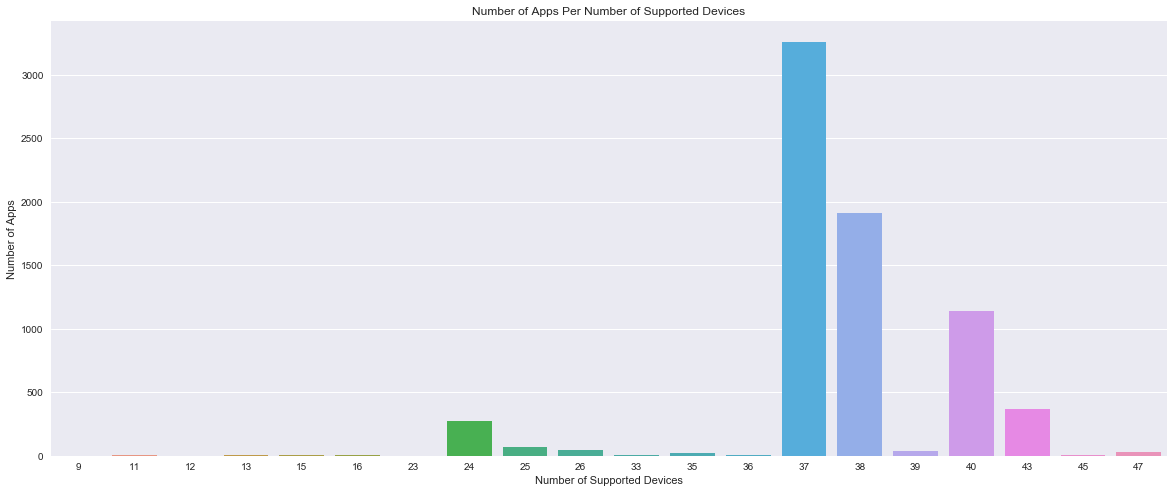

In [20]:
# Plot of number of apps per number of supported devices.
plot_count('sup_devices.num', 'Number of Supported Devices', 'Number of Apps', 
          'Number of Apps Per Number of Supported Devices')

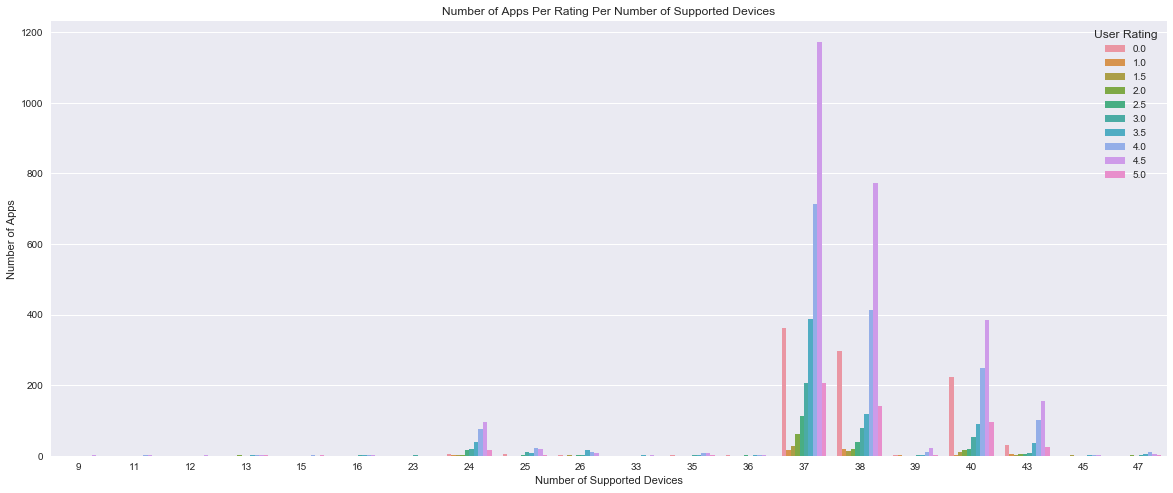

In [21]:
# Plot of number of apps per user rating per number of supported devices
plot_count('sup_devices.num', 'Number of Supported Devices', 'Number of Apps',
          'Number of Apps Per Rating Per Number of Supported Devices', hue='user_rating', legend_title='User Rating')

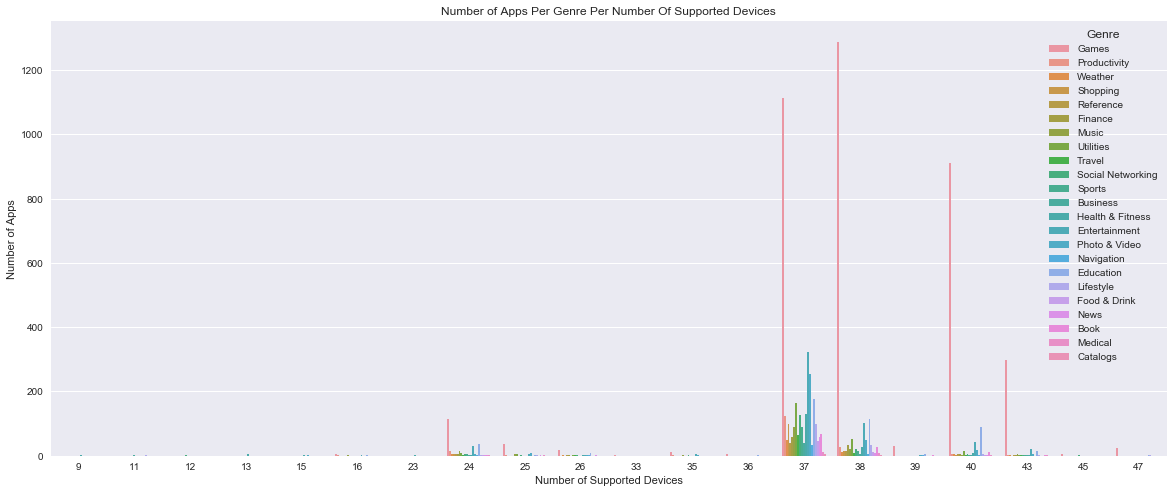

In [22]:
#Plot of Number of apps per genre per number of supported devices
plot_count('sup_devices.num', 'Number of Supported Devices', 'Number of Apps', 
          'Number of Apps Per Genre Per Number Of Supported Devices', hue='prime_genre', legend_title='Genre')

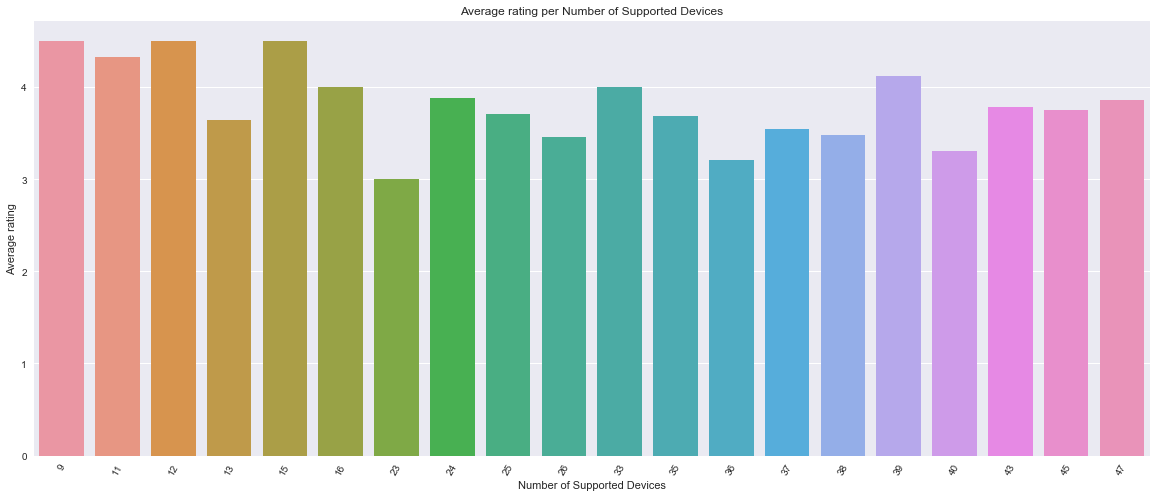

In [23]:
# Here, we we plot the average rating per number of supported devices

index, count = np.unique(app_store["sup_devices.num"],return_counts=True)
stats = app_store.groupby("sup_devices.num")['user_rating']
devices, count = np.unique(app_store["sup_devices.num"],return_counts=True)
describe = stats.describe()
describe["sup_devices.num"]=devices
bar_chart(describe["mean"],index,(20,8),"Average rating", "Number of Supported Devices","Average rating per Number of Supported Devices" ,60)


### Observation:
Most applications support 37 devices. I think the number of supported devices affect the number of persons who can use the app, which affects the number of ratings. The games genre has the highest number of apps per number of supported devices, followed by the entertainment and education genres(this is most likely due to the fact that games make more that half of the dataset, followed by the entertainment and education genres as well).
The average rating per number of supported devices shows all ratings above 3,meaning not very relevant in this case(in predicting user ratings), given that the number of apps per supported devices is not even closely uniformly spread. 

### 7 Price distribution of apps in our dataset
In this section, we will try to investigate how prices are distributed, what is the highest price, the lowest price, mean price and more. All this will help one know if his app should be free or paid, as well as how much to charge if it is paid.

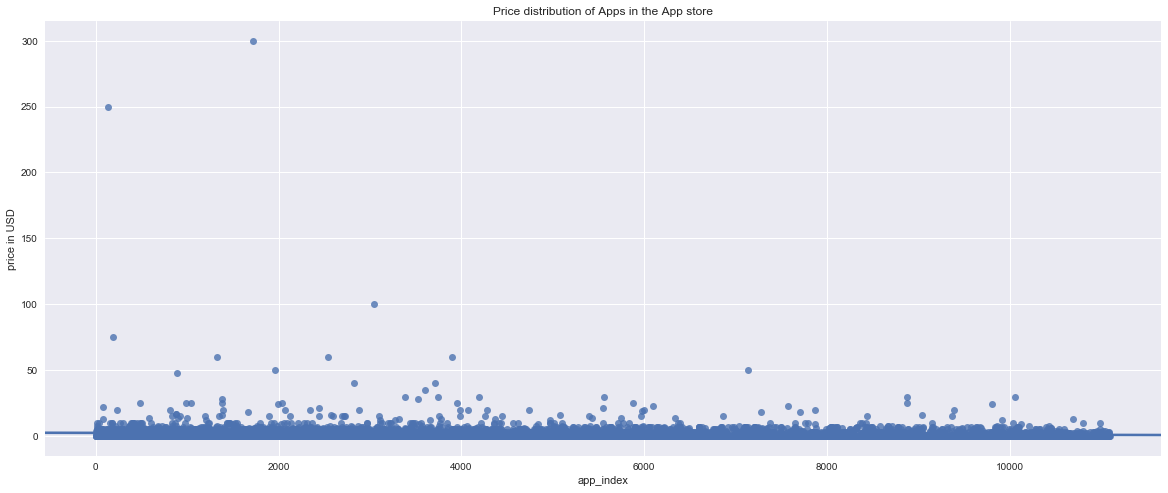

In [24]:
# Make a copy of the data
app_store_data = app_store.copy()
# Plotting the Price distribution 
plot = sns.regplot(x=app_store['csv_index'], y=app_store['price'])
plot.set(xlabel='app_index', ylabel='price in USD', title='Price distribution of Apps in the App store')

In [25]:
new_prices = []
indices = []
counted = 0
summation = 0
prices = app_store_data['price'].tolist()
for price in prices:
    if price > 0:
        new_prices.append(1)
        counted = counted + 1
        summation = summation + price
    else:
        new_prices.append(0)
        
series = pd.Series(new_prices)
app_store_data['is paid'] = series.values
max = app_store_data["price"].max()
min = app_store_data["price"].min()
mean = app_store_data["price"].mean()
mean_of_paid = summation/counted
print(mean_of_paid)
print(mean)
print(max)

3.955297675899211
1.7262178685562626
299.99


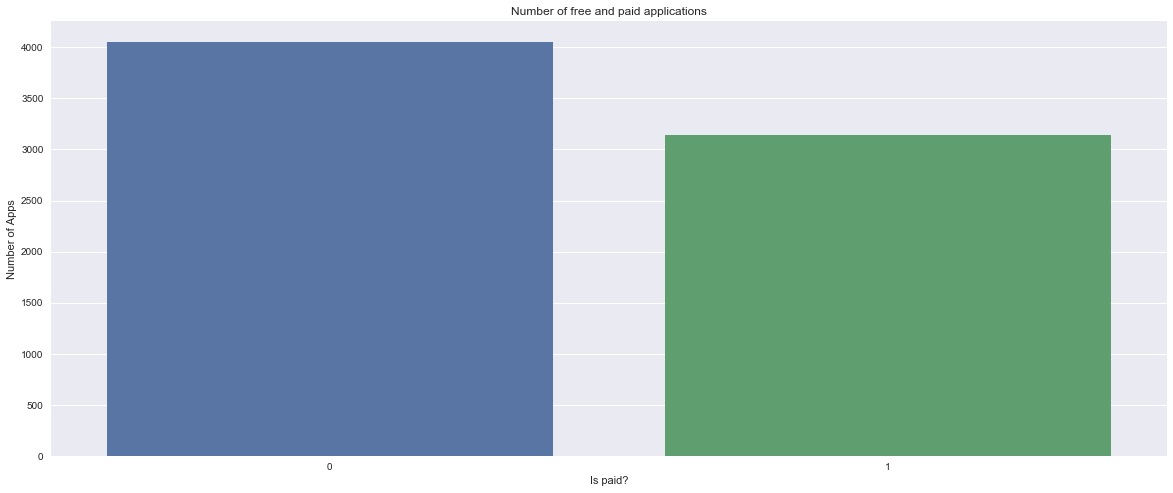

In [26]:
# Plot Column chart of number of paid and free applications.
# In the chart, an x value of 0 means "not paid", while 1 means "paid"
plot_count('is paid', 'Is paid?', 'Number of Apps', 
           'Number of free and paid applications', data=app_store_data)

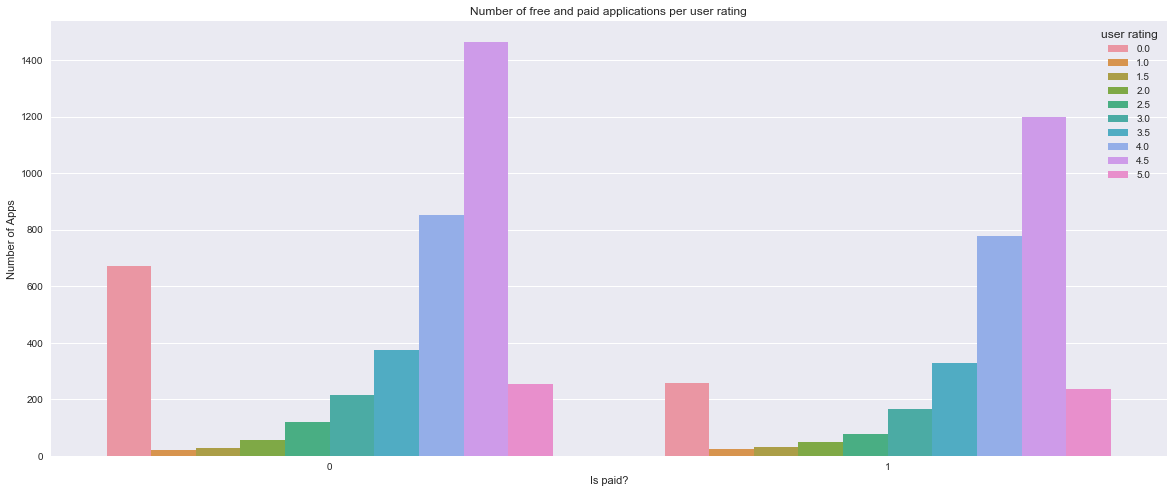

In [27]:
# Plot Number of Free and Paid Apps Per User Rating
plot_count('is paid', 'Is paid?', 'Number of Apps', 
           'Number of free and paid applications per user rating', data=app_store_data, hue='user_rating', legend_title='user rating')

[4056 3141]
Free apps make up to 0.5635681533972489 of the dataset


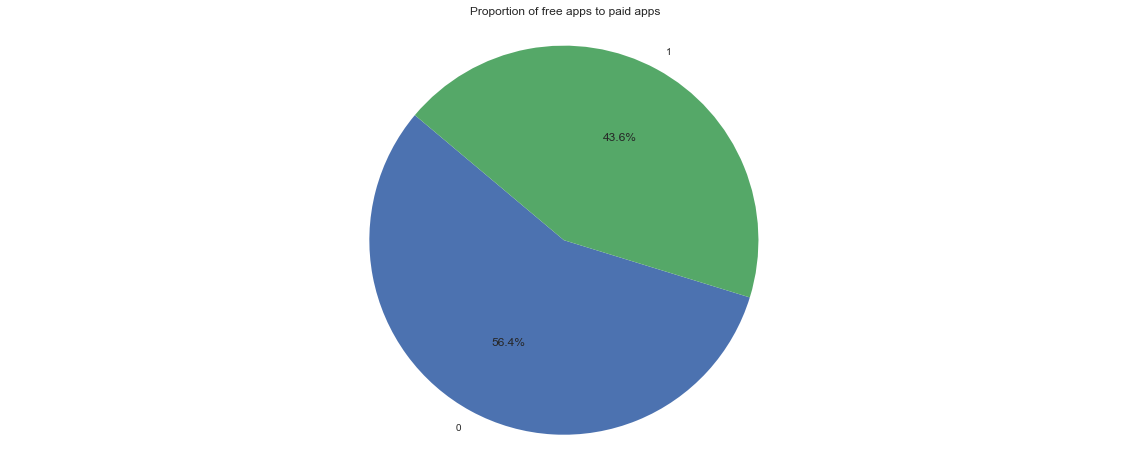

In [28]:
# Plotting a bar chart showing ratio of free to paid apps.
# Paid apps have a label of 1, and free apps a label of 0
index, count = np.unique(app_store_data["is paid"],return_counts=True)
unique = app_store_data["is paid"].nunique()
print(count)
count = count/count.sum()

print('Free apps make up to {} of the dataset'.format(count[0]))

pie_chart(count, index, "Proportion of free apps to paid apps")


Most apps are less than 25 US dollars, and even much less, given that the average price of all the
apps(paid and unpaid) is approximately 1.73 dollars. The average for paid apps only is approximately
3.96 dollars. This should help inform us when we are deciding on a price, if we decide it is a paid app.
The maximum price for an app in our dataset is 299.99US dollars, and the minimum, as we know is 0
56% of the apps are free, while 43.6 are paid. 
The ratio of the number of rated paid apps to the total number of paid apps is higher than that for rated free apps to the total number of free app, indicating that paid apps are more voted than free ones.

### 7 What App genre generates the most revenue? 
Here we are trying to investigate what app genre makes the most revenue. Since we do not have the number of downloads, we shall assume that all does who have downloaded a particular app have rated it. 
In other words, we are assuming that the total number of downloads is equal to the total number of ratings. 

> Given that we already saw that the games genre make up more that 50% of the dataset, and that the productivity genre has the highest average user rating, my hypothesis is that the game or productivity genres make the most revenue.

In [29]:
revenue = []

for index in range(7197):

    revenue.append(app_store_data.loc[[index]]['price'][index]*app_store_data.loc[[index]]['rating_count_tot'][index])
    
revenue_series = pd.Series(revenue)
total_revenue = revenue_series.sum()
app_store_data['revenue'] = revenue_series.values

print(total_revenue)

36050428.54999979


In [30]:
total_revenue = revenue_series.sum()
print(total_revenue)

36050428.54999979


prime_genre
Book                    90395.41
Business               733893.35
Catalogs                10458.91
Education              922053.85
Entertainment          739470.51
Finance                 40822.14
Food & Drink            47628.68
Games                26210820.32
Health & Fitness       906875.05
Lifestyle              133064.67
Medical                129859.44
Music                 1293572.97
Navigation             175591.59
News                   186763.48
Photo & Video         1121039.86
Productivity          1780758.05
Reference              366515.64
Shopping                 5416.78
Social Networking       39196.66
Sports                  29413.19
Travel                  57228.12
Utilities              533624.73
Weather                495965.15
Name: revenue, dtype: float64


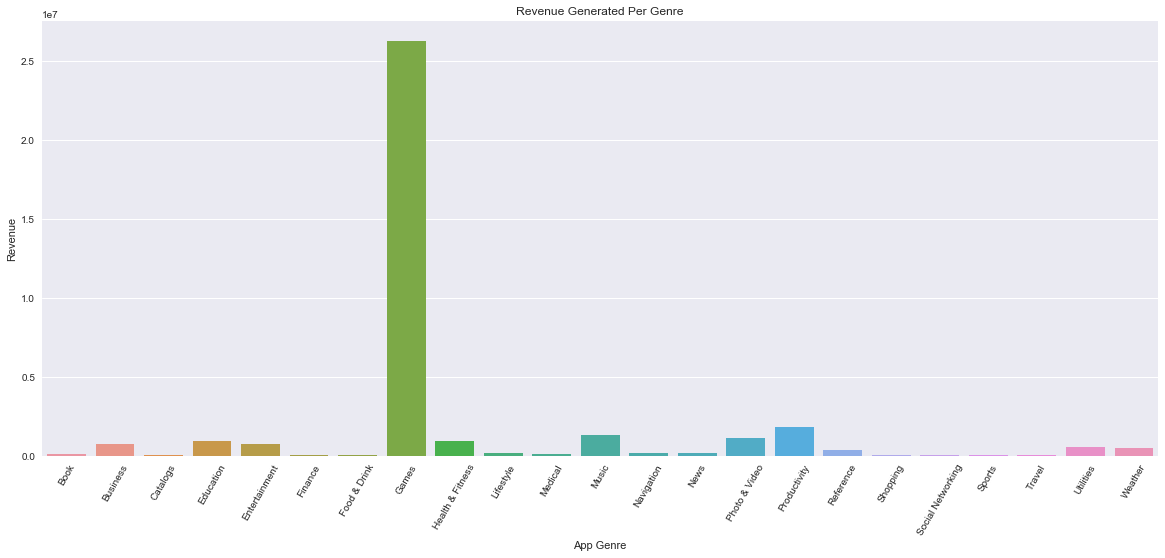

In [31]:
# Here, we we plot the revenue per genre

index, count = np.unique(app_store_data["prime_genre"],return_counts=True)
stats = app_store_data.groupby("prime_genre")['revenue'].sum()
print(stats)
type(stats)
devices, count = np.unique(app_store_data["prime_genre"],return_counts=True)
describe = stats.describe()
describe["revenue"]=devices


bar_chart(stats,index,(20,8),"Revenue", "App Genre","Revenue Generated Per Genre" ,60)


#### Observation
The hypothesis was right. The games genre do not only make up about 53% of the appsotre, but also generate the most revenue (26,210,820USD in total). The next genre that generates the most amount of revenue is the prodctivity genre. 
It actually is also the genre with the highest average rating as seen previously.


## Step 3: Data Preparation
Great! Our data has no null values. We also have done quick check(manual) to see if there were any values that do not make sense(a rating of 9 for example). Given that this is data from the apple store itself, I don't think the data is very dirty. What could have been a source of problem would be empty values or NaNs, but that has been taken care of already. We are not integrating data from any other site.

We have also done some analysis to determine how some features of our data are correlated. We have found for example that the number of languages does not affect the rating, but the genre of the app does. 

We now want to prepare our data to so as to use it to build a model that can predict whether an app is highly rated(a rating greater than or equal to 4) or has a low rating(a rating below 4)

In the process, we will use results from the previous analysis and exploration to keep some features of the data, as well as discard some other. 

The features we found most relevant affecting user rating are:
+ genre
+ ipadSc_urls.num

We however use Recursive Feature Elimination(RFE) to find the most relevant features for building our model. 

We will now clean our data to leave only the relevant features and change categorical features like genre in an appropriate format for our model.

In [32]:
'''
What we are trying to predict is 'user_rating'. Since the data is categorical-ordinal, we can classify
ratings as 'low_rated'(being a rating below 4) and 'high_rated'(being a rating above or equal to 4)
We thus set the user_ratings below 4 to 0 and the others to 1, since the classifier accepts only numerical data
and view the first 10 rows
'''
app_store_data['user_rating'] = app_store_data['user_rating'].replace([3.5, 3, 2.5, 2, 1.5, 1, 0.5], 0)
app_store_data['user_rating'] = app_store_data['user_rating'].replace([4, 4.5, 5], 1)
app_store_data.head()

,csv_index,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic,is paid,revenue
0,1,281656475,PAC-MAN Premium,100788224,USD,3.99,21292,26,1.0,4.5,6.3.5,4+,Games,38,5,10,1,1,84955.08
1,2,281796108,Evernote - stay organized,158578688,USD,0.00,161065,26,1.0,3.5,8.2.2,4+,Productivity,37,5,23,1,0,0.00
2,3,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,USD,0.00,188583,2822,0.0,4.5,5.0.0,4+,Weather,37,5,3,1,0,0.00
3,4,282614216,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,USD,0.00,262241,649,1.0,4.5,5.10.0,12+,Shopping,37,5,9,1,0,0.00
4,5,282935706,Bible,92774400,USD,0.00,985920,5320,1.0,5.0,7.5.1,4+,Reference,37,5,45,1,0,0.00


#### Having an appercu of Distribution of data as done before but with new ratings of 0 and 1

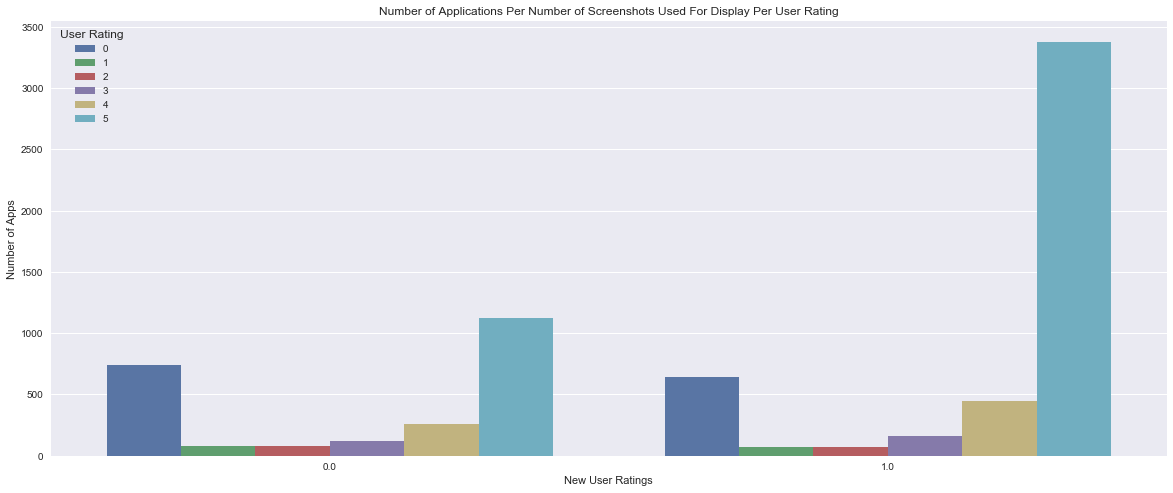

In [33]:
plot_count('user_rating', 'New User Ratings', 'Number of Apps',
          'Number of Applications Per Number of Screenshots Used For Display Per User Rating',
          data=app_store_data, hue='ipadSc_urls.num', legend_title='User Rating', loc='upper left')

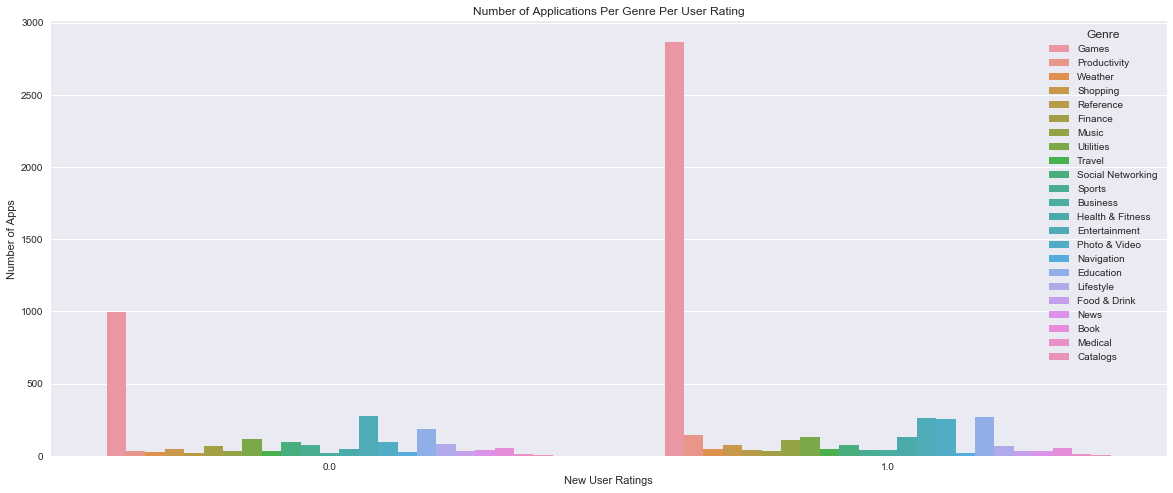

In [34]:
plot_count('user_rating','New User Ratings', 'Number of Apps',
          'Number of Applications Per Genre Per User Rating', data=app_store_data, hue='prime_genre', legend_title='Genre')

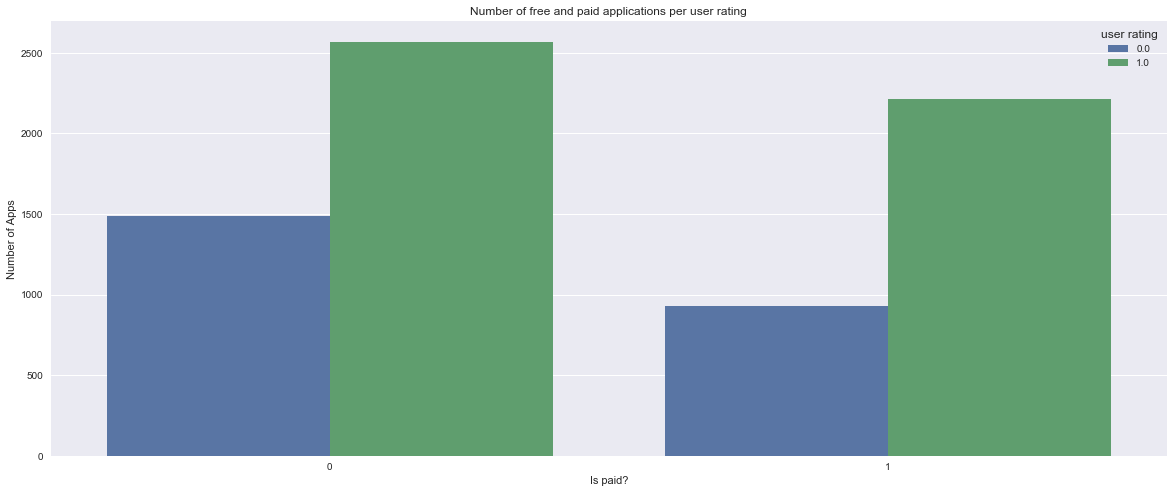

In [35]:
# Plot Number of Free and Paid Apps Per User Rating
plot_count('is paid', 'Is paid?', 'Number of Apps', 
           'Number of free and paid applications per user rating', data=app_store_data, hue='user_rating', legend_title='user rating')

In [36]:
# We select the features we think affect the user rating and put them in a new dataframe 'new_df2'
input_rows2 = ['ipadSc_urls.num', 'user_rating', 'price', 'sup_devices.num', 'lang.num']
new_df2 = app_store_data[input_rows2]

# we convert the genre into ints(a format acceptable to our classifier), and concatenate them to the new dataframe
prime_genre = pd.get_dummies(app_store_data['prime_genre'], drop_first=True)
new_df2 = pd.concat([new_df2,prime_genre], axis=1)

# Have an apercu of what the new dataframe looks like
new_df2.head()

,ipadSc_urls.num,user_rating,price,sup_devices.num,lang.num,Business,Catalogs,Education,Entertainment,Finance,...,News,Photo & Video,Productivity,Reference,Shopping,Social Networking,Sports,Travel,Utilities,Weather
0,5,1.0,3.99,38,10,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,5,1.0,0.00,37,23,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,5,0.0,0.00,37,3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,5,1.0,0.00,37,9,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,5,1.0,0.00,37,45,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [37]:
# X is our data, and Y the labels
X = new_df2.drop('user_rating', axis=1)
y = new_df2['user_rating']
X.head()

,ipadSc_urls.num,price,sup_devices.num,lang.num,Business,Catalogs,Education,Entertainment,Finance,Food & Drink,...,News,Photo & Video,Productivity,Reference,Shopping,Social Networking,Sports,Travel,Utilities,Weather
0,5,3.99,38,10,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,5,0.00,37,23,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,5,0.00,37,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,5,0.00,37,9,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,5,0.00,37,45,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [38]:
# Using Recursive Feature Elimination to select best or worst performing features. 

from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
rfe = RFE(logreg)
rfe = rfe.fit(X, y )
print(rfe.support_)
print(rfe.ranking_)

[False False False False  True  True False False  True False  True  True
 False False  True  True False  True  True  True  True False  True False
 False  True]
[ 5 13 14 12  1  1  8  6  1  7  1  1 10  2  1  1  4  1  1  1  1  9  1  3 11
  1]


In [39]:
ls = list(X.columns.values)
print(ls)

['ipadSc_urls.num', 'price', 'sup_devices.num', 'lang.num', 'Business', 'Catalogs', 'Education', 'Entertainment', 'Finance', 'Food & Drink', 'Games', 'Health & Fitness', 'Lifestyle', 'Medical', 'Music', 'Navigation', 'News', 'Photo & Video', 'Productivity', 'Reference', 'Shopping', 'Social Networking', 'Sports', 'Travel', 'Utilities', 'Weather']


In [40]:
#cols = [ls[3], ls[4], ls[7], ls[9], ls[10], ls[12], ls[13], ls[14], ls[16], ls[17], ls[18], ls[19], ls[21], ls[25] ]
cols = [ls[4], ls[5], ls[8], ls[10], ls[11], ls[14], ls[15], ls[17], ls[18], ls[19], ls[20],ls[22], ls[25] ]

In [41]:
X = X[cols]
y = y

In [42]:
# Using sklearn, we split our data into training and validation sets.
train_data,test_data, train_label , test_label = train_test_split(X, y, test_size=0.2, random_state=42)

## Steps 4 and 5: Analytical Modelling And Validation
Since we are working with categorical data, we are going to try 2 models; Logistic Regression and a Support Vector Machine. If we get an accuracy of 60%, that will not be the best, but it will be pretty good. It means we can predict if an app will be highly rate, or lowly rated using our model.

Knowing how each feature affects the ratings can thus help us position ourselves better when trying to choose which of those killer apps we have in mind to implement and publish.

### Using Logistic Regression

In [43]:
# We choose sklearn's logistic regression model since we are dealing with categorical data. 
log_model = LogisticRegression()

In [44]:
# Fitting our data
log_model.fit(train_data, train_label)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [45]:
prediction = log_model.predict(test_data)

In [46]:
classification_report(test_label, prediction)

'             precision    recall  f1-score   support\n\n        0.0       0.67      0.09      0.16       496\n        1.0       0.67      0.98      0.80       944\n\navg / total       0.67      0.67      0.58      1440\n'

In [47]:
confusion_matrix(test_label, prediction)

array([[ 44, 452],
       [ 22, 922]])

In [48]:
accuracy_score(test_label, prediction)

0.67083333333333328

In [64]:
# Finetuning parameters to find the best parameters for logistic regression


# Create regularization hyperparameter space
C = np.logspace(0, 4, 20)

# Create regularization penalty space
penalty = ['l1', 'l2']
hyperparameters = dict(C=C, penalty=penalty)

# Create grid search using 5-fold cross validation
clf = GridSearchCV(log_model, hyperparameters, cv=5, verbose=0)
# Fit grid search
best_model = clf.fit(X, y)

# Use best parameters
selected_penalty=best_model.best_estimator_.get_params()['penalty']
selected_c=best_model.best_estimator_.get_params()['C']

# Generate the resulting accuracy
log_model2 = LogisticRegression(penalty=selected_penalty,C=selected_c)
log_model2.fit(train_data, train_label)
prediction2 = log_model2.predict(test_data)

accuracy_score(test_label, prediction2)

0.6958333333333333

### Using Support Vector Machine

In [50]:
# label variable for use with support Vector Machine
labels = new_df2['user_rating']


In [51]:
#scale the data using minmaxscaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler().fit(new_df2.drop('user_rating', axis=1))
#scaler = MinMaxScaler().fit(new_df)
new_df = scaler.transform(new_df2.drop('user_rating', axis=1))

In [52]:
from sklearn.cross_validation import train_test_split
train_data,test_data, train_label , test_labels = train_test_split(new_df, labels, test_size=0.2, random_state=42)


In [53]:
from sklearn import svm
clf = svm.LinearSVC(C=0.01)
clf.fit(train_data, train_label)  

LinearSVC(C=0.01, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [54]:
result = clf.score(train_data, train_label)
print("Train accuracy {}".format(result))

Train accuracy 0.6967170401250652


In [55]:
result2 = clf.score(test_data, test_labels)
print("Test accuracy {}".format(result2))

Test accuracy 0.6902777777777778


In [56]:
param_grid = {'C':[1,10,100,1000],'gamma':[1,0.1,0.001,0.0001], 'kernel':['linear','rbf']}

In [57]:
grid = GridSearchCV(SVC(),param_grid,refit = True, verbose=2)

In [58]:
grid.fit(train_data, train_label)





Fitting 3 folds for each of 32 candidates, totalling 96 fits
[CV] C=1, gamma=1, kernel=linear .....................................
[CV] ............................ C=1, gamma=1, kernel=linear -   0.5s
[CV] C=1, gamma=1, kernel=linear .....................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s


[CV] ............................ C=1, gamma=1, kernel=linear -   0.4s
[CV] C=1, gamma=1, kernel=linear .....................................
[CV] ............................ C=1, gamma=1, kernel=linear -   0.5s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV] ............................... C=1, gamma=1, kernel=rbf -   0.9s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV] ............................... C=1, gamma=1, kernel=rbf -   0.9s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV] ............................... C=1, gamma=1, kernel=rbf -   0.8s
[CV] C=1, gamma=0.1, kernel=linear ...................................
[CV] .......................... C=1, gamma=0.1, kernel=linear -   0.5s
[CV] C=1, gamma=0.1, kernel=linear ...................................
[CV] .......................... C=1, gamma=0.1, kernel=linear -   0.4s
[CV] C=1, gamma=0.1, kernel=linear ...................................
[CV] .

[CV] ........................... C=100, gamma=0.1, kernel=rbf -   1.1s
[CV] C=100, gamma=0.001, kernel=linear ...............................
[CV] ...................... C=100, gamma=0.001, kernel=linear -   1.0s
[CV] C=100, gamma=0.001, kernel=linear ...............................
[CV] ...................... C=100, gamma=0.001, kernel=linear -   5.0s
[CV] C=100, gamma=0.001, kernel=linear ...............................
[CV] ...................... C=100, gamma=0.001, kernel=linear -   1.3s
[CV] C=100, gamma=0.001, kernel=rbf ..................................
[CV] ......................... C=100, gamma=0.001, kernel=rbf -   0.9s
[CV] C=100, gamma=0.001, kernel=rbf ..................................
[CV] ......................... C=100, gamma=0.001, kernel=rbf -   0.9s
[CV] C=100, gamma=0.001, kernel=rbf ..................................
[CV] ......................... C=100, gamma=0.001, kernel=rbf -   0.9s
[CV] C=100, gamma=0.0001, kernel=linear ..............................
[CV] .

[Parallel(n_jobs=1)]: Done  96 out of  96 | elapsed:  3.3min finished


GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'C': [1, 10, 100, 1000], 'gamma': [1, 0.1, 0.001, 0.0001], 'kernel': ['linear', 'rbf']},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=2)

In [59]:
grid.best_params_

{'C': 100, 'gamma': 1, 'kernel': 'rbf'}

In [60]:
predic = grid.predict(test_data)

In [61]:
print(classification_report(test_label,predic))
print(confusion_matrix(test_label, predic))

             precision    recall  f1-score   support

        0.0       0.56      0.32      0.41       496
        1.0       0.71      0.87      0.78       944

avg / total       0.66      0.68      0.65      1440

[[159 337]
 [126 818]]


In [62]:
accuracy_score(test_label, predic)

0.67847222222222225

#### Observation And Conclusion
The user rating can indeed be predicted with 69% confidence. This answers the last question posed.
Both the Logistic Regression and the SVM models work pretty well, and have almost same results. 
The logistic regression model should be choosen as it is about 2% more accurate. 

So my dear friend, if you want to increase the probability of you app having high ratings, and increasing the chances of it making it amongst the top 100;
+ Choose the category wisely
+ Include 5 nice images for display
+ Maximise number of supported devices

The *deployment* part of CRISP-DM process is found on [this](https://medium.com/@white.zephyrzen/improving-chances-of-having-better-ratings-for-apps-on-the-ios-app-store-using-data-analysis-and-c7ee93fe7590) medium blog.